
# <p style="text-align:center;">**SAAS SALES (AWS)**</p>
### <p style="text-align:center;">**Modul 2**</p>
---



##**BACKGROUND**

SaaS Sales (AWS) Dataset provides comprehensive data related to the sales, transactions, and performance of Software as a Service (SaaS) products. This dataset includes information on sales transactions, discounts, profit margins, products, regions, and other variables that offer valuable insights into the company’s overall performance. For businesses operating in the SaaS industry, understanding the factors that drive revenue and profitability is crucial to making informed decisions.

As businesses continue to scale and expand, the ability to analyze and optimize sales strategies can significantly enhance profitability. The following problem statements are identified to leverage the available data and offer actionable insights to improve decision-making within the company.



## **RESEARCH PROBLEM**

1. Tracking Profitability Analysis
2. Analyzing the amount of Sales and Profit distribution


***
# **LOAD DATA**

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.colors  as colors
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


There are 9994 rows and 19 columns in this dataset

# **FEATURE DESCRIPTION**
1. `Row ID` : A unique identifier for each transaction.
2. `Order ID` : A unique identifier for each order.
3. `Order Date` : The date when the order was placed.
4. `Date Key` : A numerical representation of the order date (YYYYMMDD).
5. `Contact Name` : The name of the person who placed the order.
6. `Country` : 	The name of the person who placed the order.
7. `City` : The city where the order was placed.
8. `Region` : The region where the order was placed.
9. `Subregion` : 	The subregion where the order was placed.
10. `Customer` :  The name of the company that placed the order.
11. `Customer ID` : A unique identifier for each customer.
12. `Industry`	: The industry the customer belongs to.  
13. `Segment` : The customer segment (SMB, Strategic, Enterprise, etc.).
14. `Product` : The product was ordered.
16. `Sales` : 	The license key for the product.
17. `Quantity` : The total sales amount for the transaction.
18. `Discount` : The total number of items in the transaction.
19. `Profit` : The discount applied to the transaction.
20. `Profit` : The profit from the transaction.


# **DATA UNDERSTANDING**

**Get some basic information from the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### **Data Cleaning**

**Check for missing values and duplicates**

In [4]:
df.isnull().any()

,0
Row ID,False
Order ID,False
Order Date,False
Date Key,False
Contact Name,False
Country,False
City,False
Region,False
Subregion,False
Customer,False


Text(0.5, 1.0, 'Total Missing values')

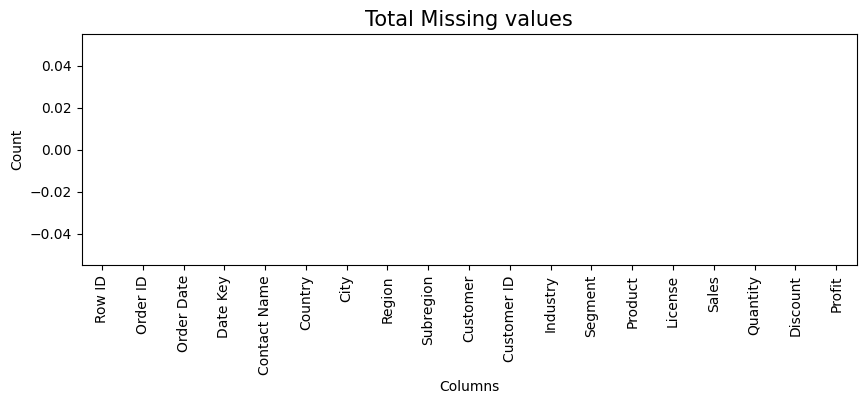

In [5]:
total_missing = df.isnull().sum().sort_values(ascending=False)
total_missing_select = total_missing
total_missing_select.plot(kind='bar', figsize = (10,3), fontsize = 10)

plt.xlabel("Columns", fontsize = 10)
plt.ylabel("Count", fontsize  = 10)
plt.title("Total Missing values", fontsize = 15)

There is no missing value in dataset

In [6]:
df.duplicated().any()

np.False_

In [7]:
print(df.duplicated().sum())

0




There is no duplicate  in dataset.There are 0 rows with duplicated value

The data types of all columns are suitable



**Converting data columns**

In [8]:
# Convert to datetime and Change Order Date (data type) from object into datetime
df['Order Date'] = pd.to_datetime(df['Order Date'],  format='%m/%d/%Y')
df.head(1)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136


In [9]:
print(df.nunique())

Row ID          9994
Order ID        5009
Order Date      1237
Date Key        1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
License         9994
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


**Check Outliers**

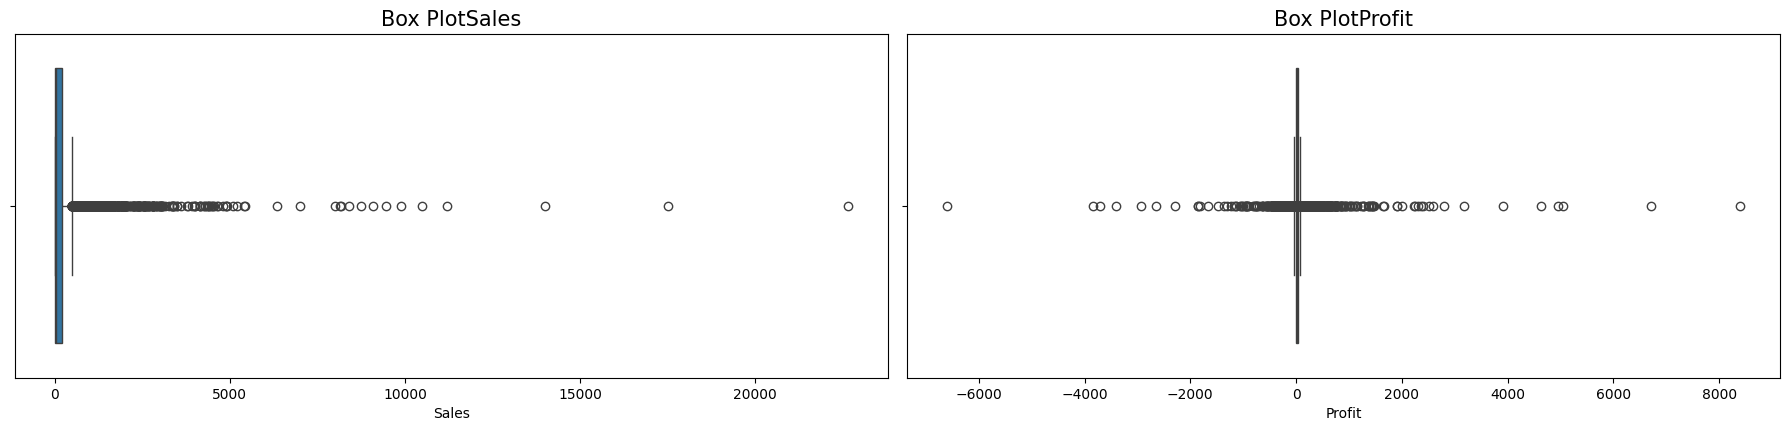

In [10]:
# Define the columns to check for outliers
columns = ['Sales', 'Profit']

# Create the box plots for each column
plt.figure(figsize=(18, 8))

# Iterate through each column and plot a box plot
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each column
    sns.boxplot(x=df[col])  # Create the box plot
    plt.title(f'Box Plot{col}',fontsize = 15)
    plt.xlabel(col)

# Display the plot
plt.tight_layout()
plt.show()

Sales:
The high number of sales outliers indicates there are several transactions with very high values ​​that affect the overall distribution. Although the company has a number of sales with values ​​within a stable range.

Profit:
The significant number of profit outliers, both positive and negative,there are transactions that generate large profits, but there are also transactions that cause large losses

### **Data Review**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

**Describe the data**

Now that we have seen the basic info and the shape of the dataset, we want see some basic descriptive statistics of the numerical values in the dataset.

**Redundant Columns**

In [12]:
df = df.drop(['Row ID','Customer ID', 'Date Key','Contact Name','Subregion','License',], axis=1)

df.head()

,Order ID,Order Date,Country,City,Region,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,Chevron,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,Chevron,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,United States,New York City,AMER,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


In [13]:
df.describe()

,Order Date,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,623.245101,2.225110,0.206452,234.260108


The average sale is higher, but the large variation in the data shows that while many sales are smaller, there are occasionally high-value transactions.

Profits are much lower compared to sales, and some transactions even result in losses (negative profits). This suggests that costs may be high, or prices may need to be adjusted.


## **ANALYSIS**


### **Tracking Profitability Analysis**



**Overall Profit and Sales Trend**

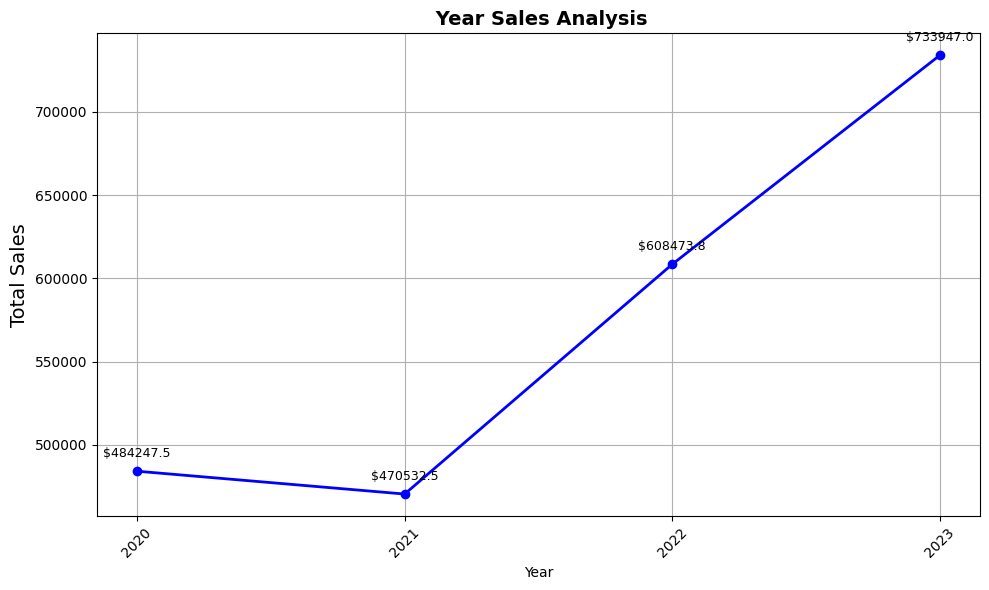

In [14]:
# Extract the year from the 'Order Date' column of the sale
df['Year'] = df['Order Date'].dt.year

sales_by_year = df.groupby('Year', as_index=False)['Sales'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sales_by_year ['Year'], sales_by_year ['Sales'], marker='o', color='b', linewidth=2)
# Add labels to each data point
for x, y in zip(sales_by_year['Year'], sales_by_year['Sales']):
    ax.annotate(f"${y:.1f}", xy=(x, y), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=9)

ax.set_title(' Year Sales Analysis', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales', fontsize=14)
ax.set_xticks(sales_by_year['Year'])
# Add Grid
ax.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The overall sales trend shows an increase, but there was a significant decline in 2021.

**Monthly sales analysis**

In [15]:
sales_by_month = df.groupby('Order Date')['Sales'].sum().reset_index()
sales_by_month['Order Month'] = pd.to_datetime(sales_by_month['Order Date']).dt.month
sales_by_month = sales_by_month.groupby('Order Month')['Sales'].sum().reset_index()
sales_by_month

,Order Month,Sales
0,1,95365.9376
1,2,59913.1934
2,3,199512.4400
3,4,141851.5674
4,5,156122.2867
5,6,147082.6113
6,7,149580.8380
7,8,159589.4510
8,9,309770.0997
9,10,197115.2017


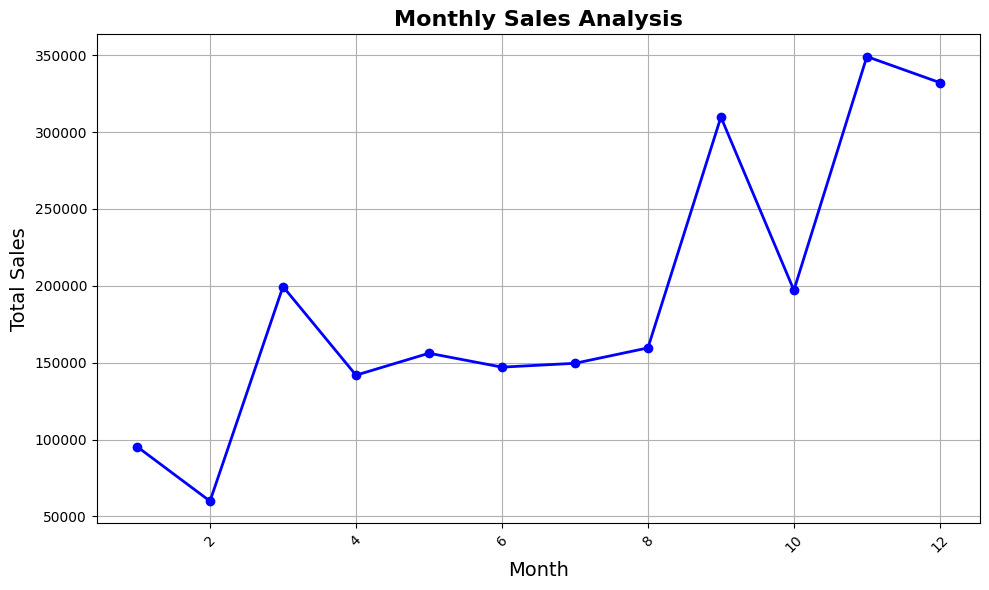

In [16]:
fig = px.line(
    sales_by_month,
    x='Order Month',
    y='Sales',
    title='Monthly Sales Analysis')
fig.update_layout(xaxis_title='Month', yaxis_title='Sales')
fig.show()

plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['Order Month'], sales_by_month['Sales'], marker='o', color='b', linestyle='-', linewidth=2)


plt.title('Monthly Sales Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Add Grid
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

November has the highest monthly sales, totaling 349.12k, while February has the lowest sales, totaling 59.91k

**Profit Distribution by Region**

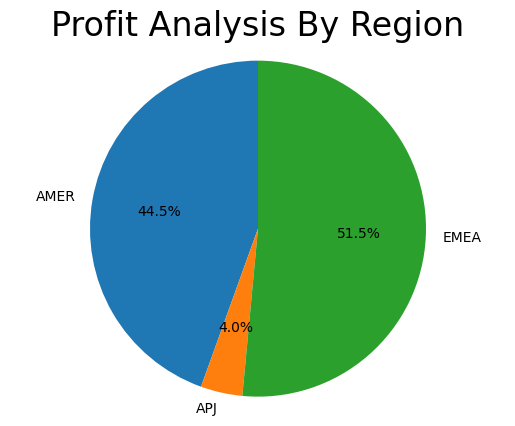

In [17]:
profit_by_region = df.groupby('Region')[['Profit']].sum().reset_index()

fig = px.pie(
profit_by_region,
values='Profit',
names='Region',
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition="inside",textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis By Region', title_font=dict(size=24))
fig.show()

profit_by_region = df.groupby('Region')[['Profit']].sum().reset_index()

# Create a pie chart
plt.pie(profit_by_region['Profit'], labels=profit_by_region['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Profit Analysis By Region', fontsize=24)
plt.axis('equal')
plt.show()

**EMEA** (51.5% / Profit **>** 147,456,045) > **AMER** (44.5% / Profit **>** 127,426,9898) > **APJ** (4.02% / Profit **>** 11,513,9869)

**Sales Distribution by Region**

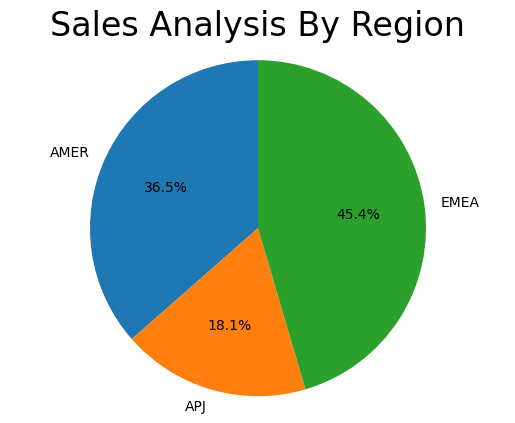

In [18]:
sales_by_region = df.groupby('Region')[['Sales']].sum().reset_index()

fig = px.pie(
sales_by_region,
values='Sales',
names='Region',
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition="inside",textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis By Region', title_font=dict(size=24))
fig.show()

sales_by_region = df.groupby('Region')[['Sales']].sum().reset_index()

# Create a pie chart
plt.pie(sales_by_region['Sales'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Sales Analysis By Region', fontsize=24)
plt.axis('equal')
plt.show()

**EMEA** (45.4% / Profit **>** 1,043,887,015) > **AMER** (36.5% / Profit **>** 837,849,6045) > **APJ** (18.1% / Profit **>** 415,464,24088)

**Distribution by Product**

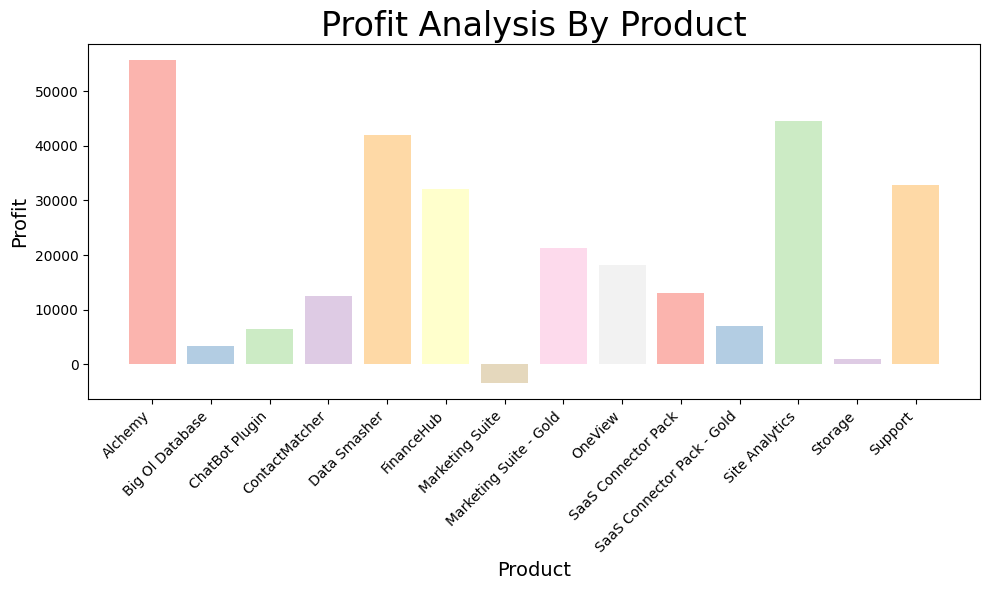

In [19]:
# Calculate profit by product
profit_by_product = df.groupby('Product')['Profit'].sum().reset_index()

#visualization code
fig = px.bar(
    profit_by_product,
    x='Product',
    y='Profit',
    title='Profit Analysis By Product',
    labels={'Product': 'Product', 'Profit': 'Profit'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.show()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(profit_by_product['Product'], profit_by_product['Profit'], color=plt.cm.Pastel1.colors)
plt.title('Profit Analysis By Product', fontsize=24)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Profit', fontsize=14)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The data shows that Alchemy have the highest profit.This because this product has unique added value and is needed by a certain market segment that is willing to pay more. while Storage have the lowest, with some product showing negative provit values.This could be due to not being in great demand. It is possible that there are some regular customers who make this product still record a small profit. However, because the volume is limited, the impact on total profit is very small.

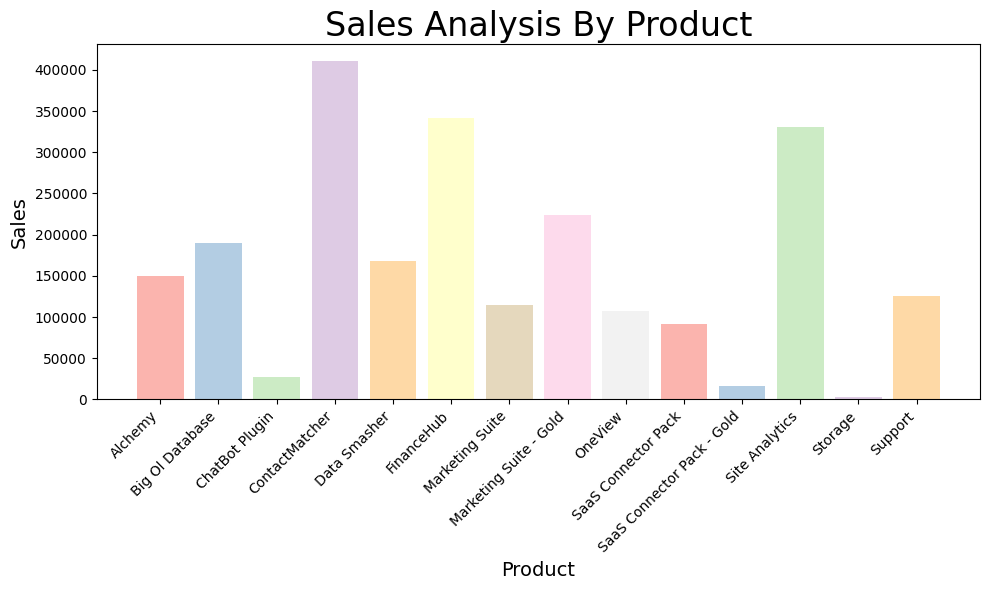

In [20]:
# Calculate profit by product
sales_by_product = df.groupby('Product')[['Sales', 'Profit']].sum().reset_index() # Include 'Profit' in the groupby aggregation
fig = px.bar(
    sales_by_product,
    x='Product',
    y='Sales',
    title='Sales Analysis By Product',
    labels={'Sales': 'Sales', 'Profit': 'Profit'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.show()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_product['Product'], sales_by_product['Sales'], color=plt.cm.Pastel1.colors)
plt.title('Sales Analysis By Product', fontsize=24)
plt.xlabel('Product', fontsize=14)
plt.ylabel('Sales', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The data shows that ContactMatcher have the highest profit.This may be due to its important function in helping businesses manage customer relationships and improve the effectiveness of sales and marketing teams.While Storage have the lowest, with some product showing negative provit values. This is likely because many competitors offer similar services at different prices

**Analyzing the sales and profit by customer segment**

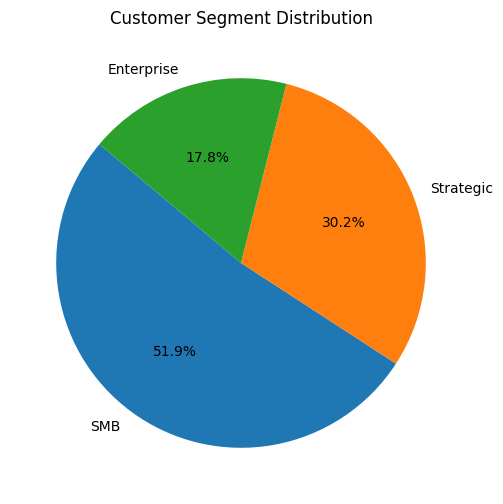

In [21]:
segment_counts = df['Segment'].value_counts()


plt.figure(figsize=(10, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Customer Segment Distribution')

# Show the plot
plt.show()

Most customers come from the SMBsegment. This because the products match their needs and budget. SMBs usually look for practical and affordable solutions, so they are more interested in using services. The number of small businesses is also much greater than large companies.

Meanwhile, the Enterprise segment has the fewest customers. This could be due to a longer purchasing process, more special needs, or because they already have other service providers.

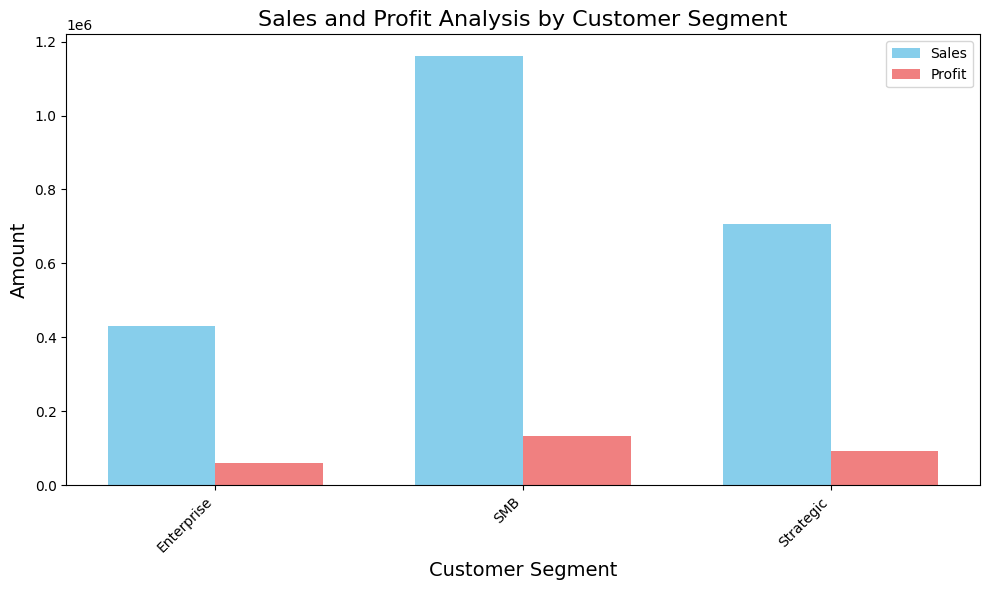

In [22]:
#Grouping the data by Segment and calculating total Sales and Profit
sales_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
#Defining a color palette for visualization
color_palette = colors.qualitative.Pastel
#Creating a figure object
fig = go.Figure()
#Adding a bar trace for sales dato
fig.add_trace(go.Bar(
  x=sales_by_segment['Segment'],
  y=sales_by_segment['Sales'],
  name ='Sales',
  marker_color=color_palette[0]
))

fig.add_trace(go.Bar(
  x=sales_by_segment['Segment'],
  y=sales_by_segment['Profit'],
  name ='Profit',
  marker_color=color_palette[1]
))
# Updating the layout of the figure
fig.update_layout(
  title='Sales and Profit Analysis by Customer Segment',
  xaxis_title='Customer Segment',
  yaxis_title="Amount"
)
fig.show()

# Asumsikan df sudah dikelompokkan sebagai 'sales_by_segment'
sales_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Membuat figure
fig, ax = plt.subplots(figsize=(10, 6))

# Menambahkan bar chart untuk Sales
bar_width = 0.35  # Lebar bar
index = range(len(sales_by_segment))  # Posisi pada sumbu x
ax.bar(index, sales_by_segment['Sales'], bar_width, label='Sales', color='skyblue')

# Menambahkan bar chart untuk Profit
ax.bar([i + bar_width for i in index], sales_by_segment['Profit'], bar_width, label='Profit', color='lightcoral')

# Menambahkan label, judul, dan pengaturan sumbu
ax.set_xlabel('Customer Segment', fontsize=14)
ax.set_ylabel('Amount', fontsize=14)
ax.set_title('Sales and Profit Analysis by Customer Segment', fontsize=16)
ax.set_xticks([i + bar_width / 2 for i in index])  # Menempatkan label segmen di tengah antara dua bar
ax.set_xticklabels(sales_by_segment['Segment'], rotation=45, ha='right')

# Menambahkan legend
ax.legend()

# Menampilkan grafik
plt.tight_layout()  # Menghindari tumpang tindih label
plt.show()

The SMB segment contributed the most to sales and profits, followed by the Strategic and Enterprise segments. This sales and profit distribution pattern is in line with the number of customers in each segment.

In [23]:
#Group the data by Segment and calculate the total sales and Profit for each segment
sales_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
#Calculate the Sales to Profit Ratio for each segment
sales_by_segment['Sales_to_Profit'] = sales_by_segment['Sales'] / sales_by_segment['Profit']
#Print the Segment and Sules to Profit Ratio colums
print(sales_by_segment[['Segment','Sales_to_Profit']])

      Segment  Sales_to_Profit
0  Enterprise         7.125416
1         SMB         8.659471
2   Strategic         7.677245


The chart shows sales and profit across different customer segments.The"SMB"segment has the highest sales and profit followed by **Strategic** and **Enterprice**.


### **Sales distribution and Profit distribution**



In [24]:
# Helper function to plot the distributions of two attributes
def plot_bar_distribution_all(value_to_plot1, value_to_plot2, xmin, xlim, value_name1, value_name2):
    plt.figure(figsize=(14, 8))

    # Create histograms
    sns.histplot(value_to_plot1, bins=150, kde=False, color='crimson', label=value_name1, alpha=0.6)
    sns.histplot(value_to_plot2, bins=150, kde=False, color='aqua', label=value_name2, alpha=0.6)

    # Set x-axis to cover the full range of Sales values
    plt.xlim(xmin, xlim)

    # Set y-axis to cover up to the maximum count of occurrences
    plt.ylim(0, plt.gca().get_ylim()[1])

    # Add titles and labels
    plt.title(f'Distribution of {value_name1} and {value_name2}')
    plt.xlabel('Sales')
    plt.ylabel('Count')

    # Add a legend to differentiate between the two attributes
    plt.legend()

    plt.show()

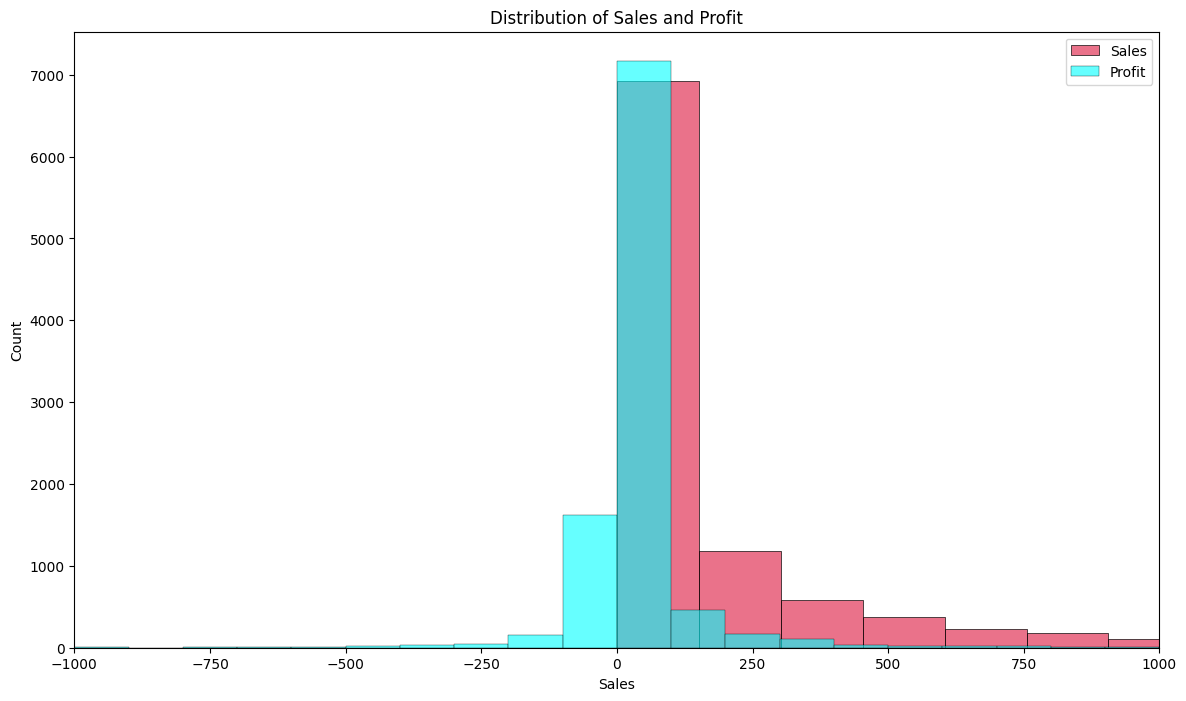

In [25]:
value_to_plot1 = df['Sales']
value_to_plot2 = df['Profit']

xmin = -1000

#Limit the x-axes to the max number of profit visible by naked eye
xlim = 1000

value_name1 = 'Sales'
value_name2 = 'Profit'

plot_bar_distribution_all(value_to_plot1, value_to_plot2, xmin, xlim, value_name1, value_name2)

This distribution shows that most of the company's transactions are transactions with small sales that generate small profits or even losses. There are some large transactions that generate significant profits, but the number is very limited. This indicates that the company should focus on increasing the profit margin from smaller transactions, or try to enlarge more profitable transactions to increase overall profitability.

In [26]:
# Helper function to plot the distributions
def plot_distribution(value_to_plot, xmin, xlim, value_name):
    plt.figure(figsize=(14, 8))

    # Create histogram
    value_distribution = sns.histplot(value_to_plot, color='limegreen', bins=150, kde=False)
    # Even if it will take out some of the precision, we are going to set a number of bins
    # to better see the data

    # Set x-axis to cover the full range of Sales values
    plt.xlim(xmin, xlim)

    # Set y-axis to cover up to the maximum count of occurrences
    plt.ylim(0, value_distribution.get_figure().axes[0].get_ylim()[1])

    plt.title(f'{value_name} Distribution')
    plt.xlabel('Sales')
    plt.ylabel('Count')

    plt.show()

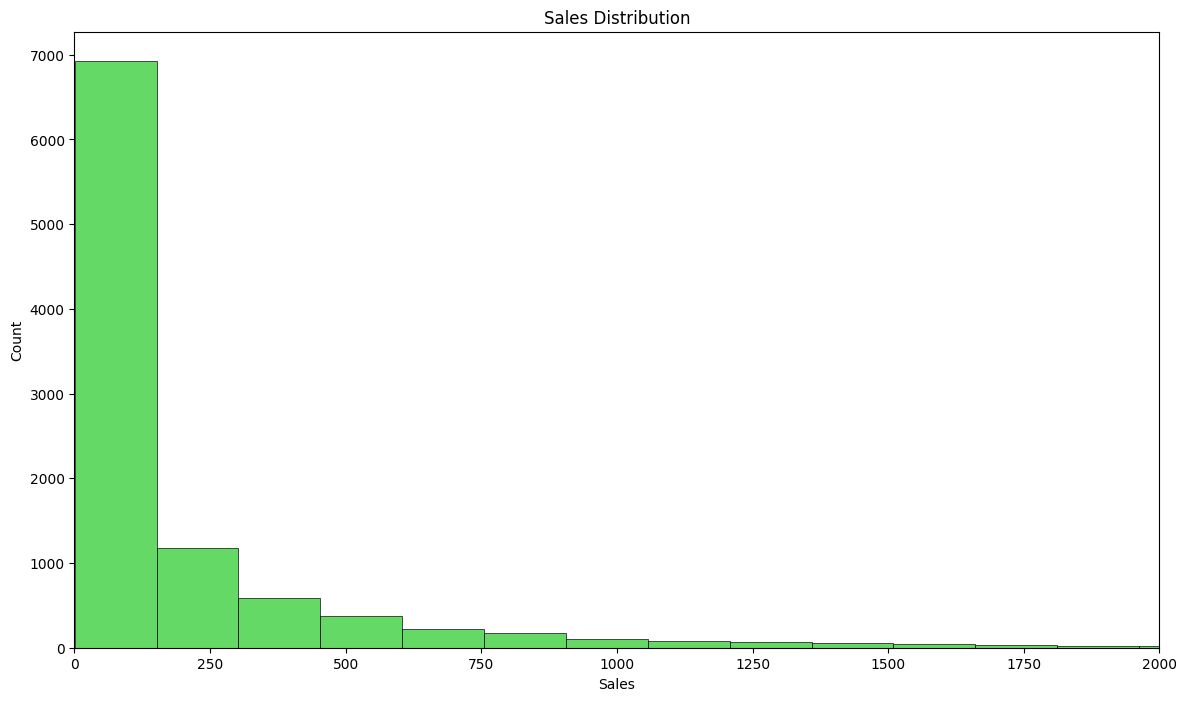

In [27]:
value_to_plot = df['Sales']

xmin = 0

#We set a maximum value for the x axis, because there are many impercettible outlayers
#That would make the plot too long
xlim = 2000

value_name = 'Sales'

plot_distribution(value_to_plot,xmin, xlim,value_name)

The distribution of sales shows that the company mostly makes transactions with small sales values. Although there are some large transactions, they are very rare. This could indicate that the company makes small transactions more often

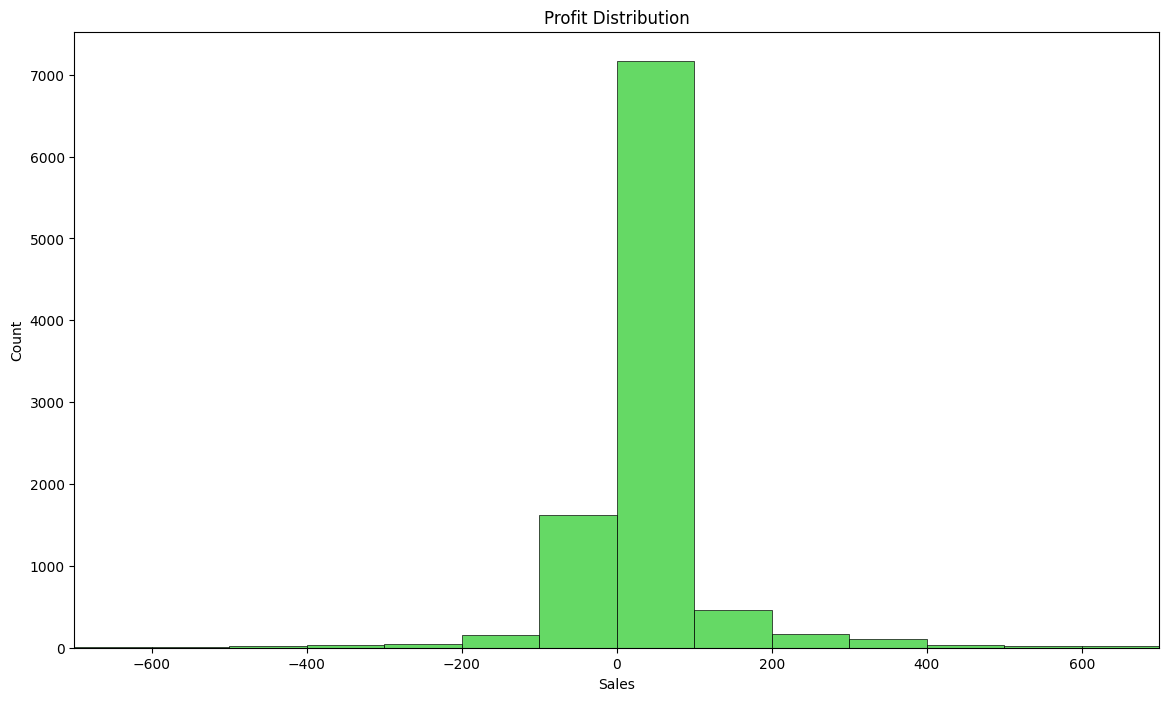

In [28]:
value_to_plot = df['Profit']

xmin = -700

#We set a maximum value for the x axis, because there are many impercettible outlayers
#That would make the plot too long
xlim = 700

value_name = 'Profit'

plot_distribution(value_to_plot,xmin,xlim,value_name)

The company appears to be doing a large number of small transactions, but only a small portion of them are generating larger Sales and Profits. The company's profits may be more dependent on the high margins of large transactions despite the small transaction volumes

In [29]:
# Helper function to plot the scatter plot
def plot_scatter(value_to_plot, xmin, xlim, value_name):
    plt.figure(figsize=(14, 8))


    x_values = range(len(value_to_plot))

    plt.scatter(x_values, value_to_plot, alpha=0.6, color='limegreen')

    # Set x-axis to cover the full range of indices
    plt.xlim(0, len(value_to_plot))

    # Set y-axis to cover the specified range of Sales values
    plt.ylim(xmin, xlim)

    plt.title(f'{value_name} Scatter Plot',fontsize=16 , fontweight='bold')
    plt.xlabel('Index',fontsize=14)
    plt.ylabel(value_name,fontsize=14)

    plt.show()

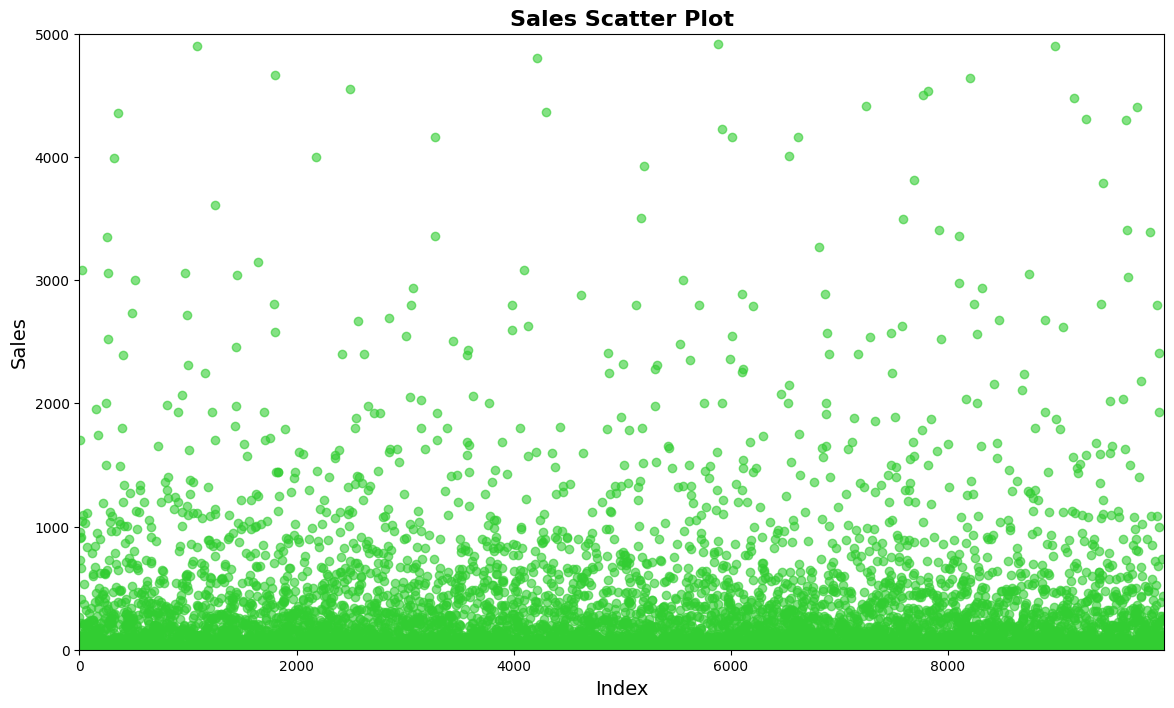

In [30]:
value_to_plot = df['Sales']

xmin = 0

#We set a maximum value for the x axis, because there are many impercettible outlayers
#That would make the plot too long
xlim = 5000

value_name = 'Sales'

plot_scatter(value_to_plot, xmin, xlim, value_name)

Sales are mostly mid-range and fairly evenly distributed without any clear patterns or clusters. A company may have a large number of transactions with comparable sales values, and no major outliers are seen.

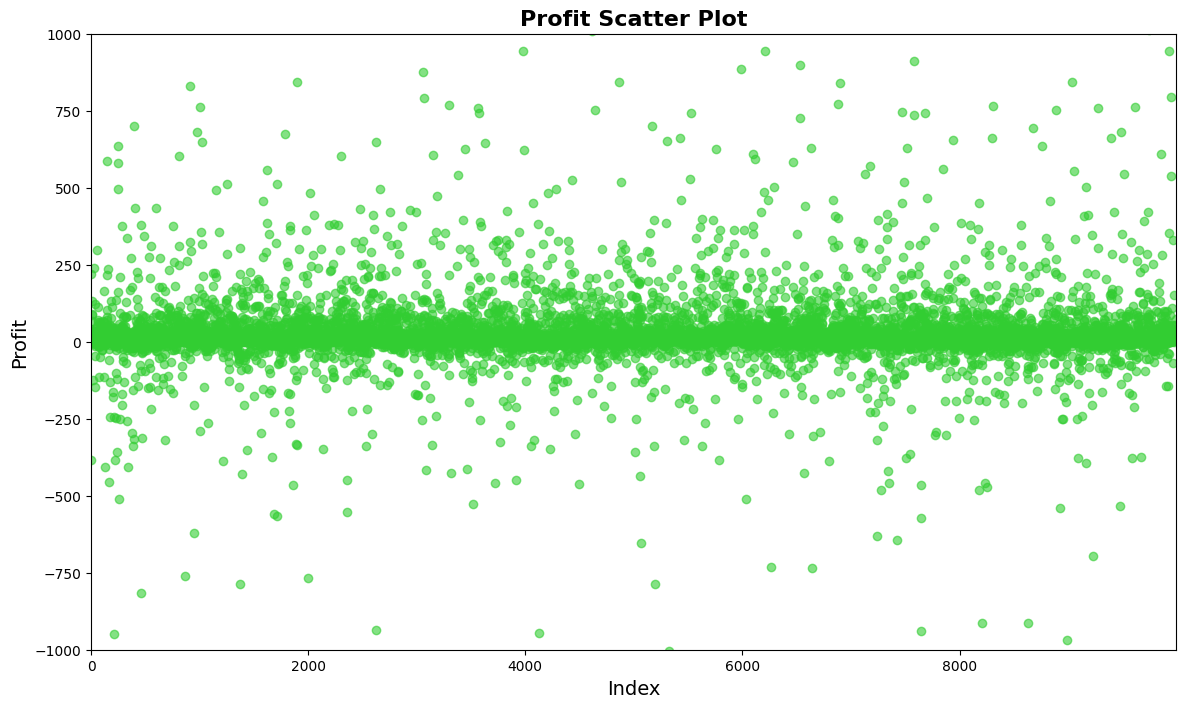

In [31]:
value_to_plot = df['Profit']

xmin = -1000

#We set a maximum value for the x axis, because there are many impercettible outlayers
#That would make the plot too long
xlim = 1000

value_name = 'Profit'

plot_scatter(value_to_plot, xmin, xlim, value_name)

Here we can see that we have more profits on the low end area (around 0). This is because some small deals result in a loss. The management should investigate this issue to potentially adjust pricing or align the objectives of the sales department, to sell only above a certain treshold and avoid losses.

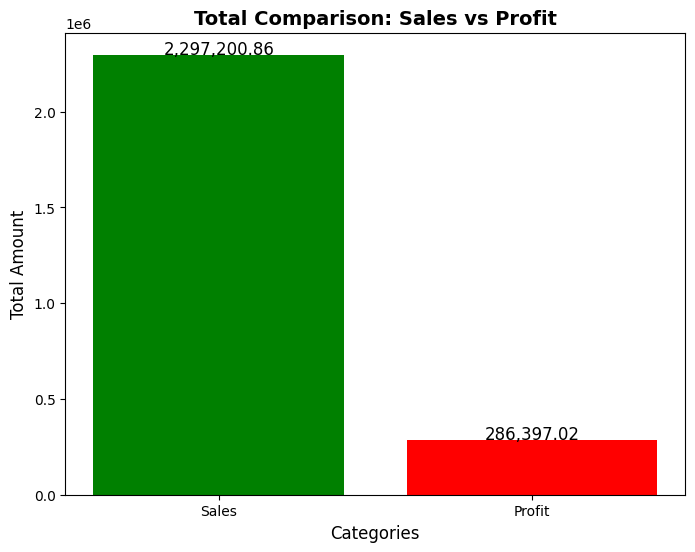

In [32]:
# Calculate the total for 'Sales' and 'Profit' columns
total_sales = np.sum(df['Sales'])
total_profit = np.sum(df['Profit'])

# Create a bar chart
categories = ['Sales', 'Profit']
values = [total_sales, total_profit]

# Set up the plot
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'red'])

# Add titles and labels
plt.title('Total Comparison: Sales vs Profit', fontsize=14, fontweight='bold')
plt.ylabel('Total Amount', fontsize=12)
plt.xlabel('Categories', fontsize=12)

# Display the value on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f'{v:,.2f}', ha='center', fontsize=12, color='black')


plt.show()

very high sales, indicating a large contribution from the transactions carried out by the company


profits that are much shorter compared to sales indicate that even though the company has high sales, the profit margin is relatively small.or high costs may affect the final profit result

In [33]:
# Comparison of Total Profit and Sales
total_sales = np.sum(df['Sales'])
total_profit = np.sum(df['Profit'])

# Calculating the Profit to Sales Ratio
profit_to_sales_ratio = total_profit / total_sales

# Displays comparison results
print(f"Total Sales: {total_sales:.2f}")
print(f"Total Profit: {total_profit:.2f}")
print(f"Profit to Sales Ratio: {profit_to_sales_ratio:.4f}")

Total Sales: 2297200.86
Total Profit: 286397.02
Profit to Sales Ratio: 0.1247


In [34]:
df['Year'] = pd.to_datetime(df['Order Date']).dt.year  # Add year column
sales_by_year = df.groupby('Year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Calculating the ratio of Profit to Sales per year
sales_by_year['Profit to Sales Ratio'] = sales_by_year['Profit'] / sales_by_year['Sales']

print(sales_by_year)

   Year        Sales      Profit  Profit to Sales Ratio
0  2020  484247.4981  49543.9741               0.102311
1  2021  470532.5090  61618.6037               0.130955
2  2022  608473.8300  81726.9308               0.134315
3  2023  733947.0232  93507.5131               0.127404



Although the company recorded a very large sales figure, the profit obtained was much smaller. This indicates that although the company made many transactions with high sales, low profit margins may affect the final profit results. The company may need to focus on improving operational efficiency or strategies to increase profitability from existing sales.


## **Result based on the analysis aws saas sales**

-  The monthly sales of the store have been calculated, identifying **November** as the month with the highest sales and **January** as the month with the lowest sales.
-  Sales have been analyzed based on product categories, determining that the category with the highest sales is **Alchemy**, and the categories with the lowest sales are **Storage**.
-  Sales and profit have been analyzed by **customer segment**, highlighting  that the SMB (Small and Medium Business) segment generates the highest sales, surpassing 1M, but with a relatively low profit margin compared to sales, suggesting that despite strong revenue, profitability could be improved. The Enterprise segment shows moderate sales of around 0.4M with similarly small profits, indicating that this segment is less profitable despite its higher average sale value. Meanwhile, the Strategic segment has sales and profits in the middle range, highlighting a need for increased performance in both areas. In conclusion, while the SMB segment is the key driver of sales, all segments could benefit from efforts to optimize profit margins and enhance overall profitability


 ## **CONCLUSION**

This analysis provide valuable insights that can greatly enhance sales strategies and increase profitability in the e-commerce sector.

- Enhancing Customer Retention : Identifying high-value customers is a critical component of any successful business strategy, as these individuals represent a significant portion of revenue and growth potential. By utilizing advanced data analytics and customer segmentation techniques, businesses can effectively pinpoint these key customers and gain a deeper understanding of their preferences, behaviors, and needs.

- Improving & Enhancing strategies for pricing and promotions involves a comprehensive approach to adjusting our pricing models in response to evolving demand trends and conducting thorough profitability analyses.


- Targeted Marketing Strategies insights to create location-specific campaigns for maximizing conversions and allows for personalized communication, fostering a connection between the brand and the consumer can boost revenue, enhance customer experience, and optimize operational costs.



 ## **RECOMENDATION**


-  **Customer Retention Strategies**: Develop targeted marketing campaigns for **'Loyal Customers'** and **'Regular customer'** to enhance engagement and encourage repeat purchases. Consider loyalty programs or exclusive offers to reward these segments.

-  **Marketing Strategy to Attract Buyer Interest**: Establishing guidelines for discount offerings maintain a competitive edge while ensuring profitability.With the overall goals of the organization, taking into account factors such as market demand and customer behavior. Moreover, it is essential to analyze the effectiveness of discounts regularly to optimize pricing strategies. This involves collecting and evaluating data on sales performance before, during, and after discount periods, as well as assessing customer feedback and market trends.

